In [1]:
import pandas as pd 
import numpy as np 

In [7]:
# This is etherium blockchain data for every our, open price of candle, highest price, lowest price, closed price of candle and
# volume in each our
df = pd.read_csv("CSVs\ETH_1h.csv")

In [8]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [9]:
df.shape

(23674, 7)

## Checking if pandas can read our date column
If the date column is in pandas available formats than we donot need to specify pandas how to read the date colum but if it is not written in specified formats than we need to tell pandas how to read that column and turn it into date time object

In [10]:
# let's pluck out first date 
df.Date[0]

'2020-03-13 08-PM'

In [11]:
# Let's check if the pandas can read the format or not, if not than we need to specify pandas how to read it
df.Date[0].day_name()

# It is giving us error that this is string object 

AttributeError: 'str' object has no attribute 'day_name'

In [12]:
# we can do this but pandas throw error because the Date column is not in the usual or conventional format 
# if it was in convential format than pandas will automatically convert this column from str to datetime
df["Date"] = pd.to_datetime(df["Date"])

ParserError: Unknown string format: 2020-03-13 08-PM

In [14]:
# So we need to specify pandas how to read it
# https://docs.python.org/3/library/datetime.html
# you can check how I picker Y for year and m for month from the link above
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d %I-%p")

In [16]:
df["Date"].dtype

dtype('<M8[ns]')

In [17]:
df["Date"]

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [19]:
# now we can apply datetime functions on it
df.Date[0].day_name()


'Friday'

## Loading csv and specify datetime there

In [71]:
df = pd.read_csv("CSVs\ETH_1h.csv", parse_dates=["Date"], date_parser=lambda x: pd.datetime.strptime(x,"%Y-%m-%d %I-%p"))

C:\Users\Meer\AppData\Local\Temp\ipykernel_13272\1464560813.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df = pd.read_csv("CSVs\ETH_1h.csv", parse_dates=["Date"], date_parser=lambda x: pd.datetime.strptime(x,"%Y-%m-%d %I-%p"))


In [72]:
df["Date"].dtype

dtype('<M8[ns]')

In [73]:
# accessing the days of all dates in "Date" column
df["Date"].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [74]:
# Adding a new column of day in dataframe
df["DayOfWeek"] =  df["Date"].dt.day_name()


In [75]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [76]:
# Checking the earliest date in the time series data
df["Date"].min()

Timestamp('2017-07-01 11:00:00')

In [77]:
# Checking the latest date in the time series data
df["Date"].max()

Timestamp('2020-03-13 20:00:00')

In [78]:
# we can also calculate the days between two dates and it is called **Time Delta**
df["Date"].max() - df["Date"].min()

Timedelta('986 days 09:00:00')

In [79]:
# Accessing only 2020 data
filt = df["Date"] >= "2020"
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ETHUSD,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [80]:
filt = df["Date"] >= "2020"
df.loc[filt].max()

# it is not going above 2022 because our last date in the df is 2020-03-13

Date         2020-03-13 20:00:00
Symbol                    ETHUSD
Open                      286.39
High                       290.0
Low                        285.1
Close                     286.39
Volume               19731142.71
DayOfWeek              Wednesday
dtype: object

In [81]:
# to get the data of only 2019 we need to set the upper bound as well
filt = (df["Date"] < "2020") & (df["Date"] >= "2019")
df.loc[filt].max()

Date         2019-12-31 23:00:00
Symbol                    ETHUSD
Open                      355.31
High                      364.49
Low                       348.84
Close                     355.31
Volume               29887309.86
DayOfWeek              Wednesday
dtype: object

In [82]:
# Another method to the same when we want to specify the days as well 
filt = (df["Date"] < pd.to_datetime("2020-01-01")) & (df["Date"] >= pd.to_datetime("2019-01-01"))
df.loc[filt].max()

# There are two methods above, either we can use pd.to_datetime() or we can directly give the string and pandas will convert it
# into the datetime object automatically while comparing

Date         2019-12-31 23:00:00
Symbol                    ETHUSD
Open                      355.31
High                      364.49
Low                       348.84
Close                     355.31
Volume               29887309.86
DayOfWeek              Wednesday
dtype: object

In [83]:
df.set_index("Date", inplace=True)

In [84]:
# we can access the date using loc after indexing or we can directly access it
df.loc["2019"]

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [91]:
df["2019"]

C:\Users\Meer\AppData\Local\Temp\ipykernel_13272\1806618128.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2019"]


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [86]:
# calculate mean of closing prices using slicing
df.loc["2020-01":"2020-02"]["Close"].mean()

195.16559027777814

In [89]:
# Finding highest value of the day
df.loc["2020-01-01"]["High"].max()

132.68

## Resampling
Resampling is used in time series data. This is a convenience method for frequency conversion and resampling of time series data. Although it works on the condition that objects must have a datetime-like index for example, DatetimeIndex, PeriodIndex, or TimedeltaIndex. In simpler words, if one wants to arrange the time series data in patterns like monthly, weekly, daily, etc., this function is very useful.

In [100]:
# Taking high of all the days using the resample method
highs = df["High"].resample("D").max()
highs["2019-02-01"]
# "D" is used for date

107.69

In [105]:
%matplotlib inline

# you add this line or not, it does not matter now, because in previous versions of jupyter notebooke
# we need to add this line to plot the graphs in the jupyternotebook but now it's the default behaviour

<AxesSubplot:xlabel='Date'>

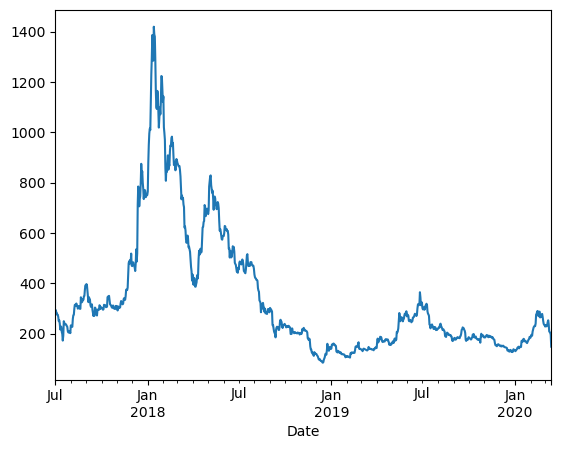

In [106]:
highs.plot()

In [109]:
# Resampling of complete dataset
df.resample("D").agg([np.mean,np.min])

C:\Users\Meer\AppData\Local\Temp\ipykernel_13272\36717790.py:2: FutureWarning: ['Symbol', 'DayOfWeek'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.resample("D").agg([np.mean,np.min])


Open                High                 Low          \
                  mean    amin        mean    amin        mean    amin   
Date                                                                     
2017-07-01  266.581538  257.13  268.698462  260.56  261.861538  253.23   
2017-07-02  268.870833  256.81  272.438750  257.92  266.422083  255.70   
2017-07-03  279.241667  274.89  280.774167  276.23  276.599583  273.07   
2017-07-04  277.042083  268.95  278.034167  270.23  275.117500  265.00   
2017-07-05  265.147917  255.42  267.120000  257.63  262.834583  252.67   
...                ...     ...         ...     ...         ...     ...   
2020-03-09  200.680417  193.26  203.311667  195.63  197.860000  189.85   
2020-03-10  201.672083  196.55  203.155000  199.37  199.912500  195.17   
2020-03-11  196.155833  184.25  197.684167  190.41  194.100833  181.00   
2020-03-12  156.276250  126.78  159.006250  126.82  148.700417  101.22   
2020-03-13  123.183810   98.88  130.563333  110.99  117.131905   90.00   

                 Close                Volume              
                  mean    amin          mean        amin  
Date                                                      
2017-07-01  265.284615  257.13  2.198771e+06   679358.87  
2017-07-02  269.782500  256.81  2.177595e+06   573434.18  
2017-07-03  278.882083  274.89  1.459015e+06   462407.68  
2017-07-04  276.743333  268.95  1.254579e+06   334254.99  
2017-07-05  265.025833  255.42  1.797923e+06   372148.76  
...                ...     ...           ...         ...  
2020-03-09  200.818333  193.26  3.804752e+06   780530.33  
2020-03-10  201.577500  196.55  1.553063e+06   518344.49  
2020-03-11  195.910417  184.25  1.894868e+06   419568.28  
2020-03-12  152.763333  110.30  7.503069e+06  1714112.98  
2020-03-13  124.060476   98.88  6.869609e+06  1940673.93  

[987 rows x 10 columns]

In [111]:
df.resample("W").mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [112]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08


In [114]:
# we can do the both things, like the upper cell syntax and this cell syntax, but upper cell syntax is more appropriate
# because there we are specifying each column and the function we want to apply on it using dictionary
df.resample("W").agg([np.mean,np.max,np.min,np.sum])

C:\Users\Meer\AppData\Local\Temp\ipykernel_13272\3588670136.py:3: FutureWarning: ['Symbol', 'DayOfWeek'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.resample("W").agg([np.mean,np.max,np.min,np.sum])


Open                                  High                  \
                  mean    amax    amin       sum        mean    amax    amin   
Date                                                                           
2017-07-02  268.066486  292.54  256.81   9918.46  271.124595  293.73  257.92   
2017-07-09  261.337024  285.00  233.45  43904.62  262.872917  285.00  234.00   
2017-07-16  196.193214  238.81  134.32  32960.46  199.204405  240.33  141.70   
2017-07-23  212.351429  245.55  155.68  35675.04  215.779286  249.40  159.54   
2017-07-30  203.496190  229.96  180.00  34187.36  205.110357  229.99  181.80   
...                ...     ...     ...       ...         ...     ...     ...   
2020-02-16  255.021667  286.39  218.32  42843.64  257.255238  290.00  219.63   
2020-02-23  265.220833  285.30  245.78  44557.10  267.263690  287.13  249.79   
2020-03-01  236.720536  276.91  212.50  39769.05  238.697500  278.13  214.79   
2020-03-08  229.923571  247.62  204.05  38627.16  231.284583  253.01  209.72   
2020-03-15  176.937521  207.79   98.88  20701.69  179.979487  208.65  110.99   

                             Low                                 Close  \
                 sum        mean    amax    amin       sum        mean   
Date                                                                     
2017-07-02  10031.61  264.819730  284.87  253.23   9798.33  268.202162   
2017-07-09  44162.65  259.186190  282.31  231.25  43543.28  261.062083   
2017-07-16  33466.34  192.722321  238.00  130.26  32377.35  195.698393   
2017-07-23  36250.92  209.126310  234.97  153.25  35133.22  212.783750   
2017-07-30  34458.54  201.714048  229.60  178.03  33887.96  203.309524   
...              ...         ...     ...     ...       ...         ...   
2020-02-16  43218.88  252.679762  285.10  216.31  42450.20  255.198452   
2020-02-23  44900.30  262.948512  282.00  242.36  44175.35  265.321905   
2020-03-01  40101.18  234.208750  274.28  209.26  39347.07  236.373988   
2020-03-08  38855.81  228.373810  245.01  196.00  38366.80  229.817619   
2020-03-15  21057.60  172.936239  205.83   90.00  20233.54  176.332821   

                                            Volume                          \
              amax    amin       sum          mean         amax       amin   
Date                                                                         
2017-07-02  292.54  256.81   9923.48  2.185035e+06   7081816.11  573434.18   
2017-07-09  282.58  233.45  43858.43  1.337349e+06   6082287.50  138947.87   
2017-07-16  238.47  134.32  32877.33  2.986756e+06  23582117.48  229799.27   
2017-07-23  245.55  159.53  35747.67  4.298593e+06  31082353.62  310988.93   
2017-07-30  229.96  180.00  34156.00  1.581729e+06   9214814.73  241425.61   
...            ...     ...       ...           ...          ...        ...   
2020-02-16  286.39  218.32  42873.34  2.329087e+06  13323454.31  411744.02   
2020-02-23  285.30  245.78  44574.08  1.826094e+06  12085035.32  333556.99   
2020-03-01  276.91  212.50  39710.83  2.198762e+06  19074673.60  222951.78   
2020-03-08  247.62  199.46  38609.36  1.628910e+06   8804126.61  262862.56   
2020-03-15  207.79   98.88  20630.94  4.259828e+06  19731142.71  419568.28   

                          
                     sum  
Date                      
2017-07-02  8.084631e+07  
2017-07-09  2.246746e+08  
2017-07-16  5.017750e+08  
2017-07-23  7.221637e+08  
2017-07-30  2.657305e+08  
...                  ...  
2020-02-16  3.912867e+08  
2020-02-23  3.067838e+08  
2020-03-01  3.693920e+08  
2020-03-08  2.736569e+08  
2020-03-15  4.983998e+08  

[142 rows x 20 columns]